In [11]:
using Distributions, Random, Plots

In [76]:
function diffusion_step(D,dt,x,y)
    return x + rand(Normal(0,sqrt(2*D*dt))), y + rand(Normal(0,sqrt(2*D*dt)))
end

function drift_step(D,chi,dt,t,tD,x,y,r_threshold,r_exp)
    r = sqrt(x^2+y^2)
    if r > r_threshold 
        xdir = x/sqrt(x^2+y^2)
        ydir = y/sqrt(x^2+y^2)
        return x - rand(Normal(xdir*chi*dt*(r^r_exp),sqrt(2*D*dt))), y - rand(Normal(ydir*chi*dt*(r^r_exp),sqrt(2*D*dt)))
    else
        return 0,0
    end
end

function MSD(x,y,ts)
    #Dist = x .+ y
    SD = x.^2 .+ y.^2;
    meansd = Array{Float64}(undef,ts)
    for i = 1:ts
        if length(SD[:,i][SD[:,i].!=0]) > 0  
            meansd[i] = mean(SD[:,i][SD[:,i].!=0])
        else
            meansd[i] = 0.0 
        end
    end
    return mean(SD,dims=1)
end

function r2_test(x1,y1,x_model,y_model)
    ssres = 0 
    sstot = 0
    for (i,x) in enumerate(x1)
        sstot += (y1[i] - mean(y1))^2
        ssres += (y_model[i*dt]-y1[i])^2#(y_model[findfirst(x -> x>x_model[1], x_model)]-y1[i])^2
    end
    return 1 - ssres/sstot
end

function interacting_sim(D1,D2,t,N,N_scouts,tD,start_time,r_threshold,r_exp)
kappa = 1
    epsilon = 1
    r_threshold = 10
    r_exp = -2
    x = Array{Float64}(undef,N,length(t))
    x.= 0
    y = Array{Float64}(undef,N,length(t))
    y.=0
    for (j,ts) in enumerate(t[1:end-1])        
        if ts < tD
            for i = 1:N
                x[i,j+1],y[i,j+1] = diffusion_step(D1,dt,x[i,j],y[i,j])
                
            end
        else
            for i = 1:N
            #print(x[i,j], "  ", y[i,j], "\n")    
            x[i,j+1],y[i,j+1] = interacting_particle(i,x[:,j],y[:,j],D2,dt,kappa,epsilon, N)
                
            end
        end
    end
    meansd = MSD(x,y,length(t))
    return meansd
end

function interacting_particle(i,x,y,D,dt,kappa,epsilon, N)
    mi = [0., 0.] 
    for j = 1:N
        if i != j
            xi = sqrt((x[i]-x[j])^2 + (y[i]-y[j])^2)
            h = 1/(epsilon + xi^2)
            mi .+= ([x[j],y[j]].-[x[i],y[i]])*h/xi
        end
    end
    print(mi)
    return mi[1],mi[2]
end

interacting_particle (generic function with 1 method)

In [77]:
D1 = 65
dt = 100
T = 3600*8
N = 5
N_scouts = 1
tD = 4190
tS = 280
r_threshold = 50
r_exp = -2
D2 = 0
kappa = 0
epsilon = 10
start_time = 280
t = start_time:dt:T
r_threshold = 50
r_exp = -2

meansd = interacting_sim(D1,D2,t,N,N_scouts,tD,start_time,r_threshold,r_exp)

[-5.82512e-6, -5.46146e-6][3.28736e-6, -2.59436e-6][1.56824e-6, -5.04749e-7][9.85993e-7, 2.35836e-7][-1.64705e-8, 8.32474e-6][2.93982, 2.42014][-2.50972, 2.20513][-0.989999, 0.441297][0.358927, -1.2112][0.200973, -3.85537][-0.112513, -0.0816115][0.173988, -0.173601][0.0689334, -0.0456433][-0.12435, 0.0907924][-0.00605854, 0.210064][2.06773, 1.7332][-2.49661, 2.37233][-1.36727, 0.501801][2.17081, -1.39661][-0.374664, -3.21071][-0.121339, -0.138372][0.164758, -0.196964][0.0440911, 0.0829471][-0.151154, 0.0832009][0.063644, 0.169188][1.7885, 2.26233][-2.13248, 2.43059][-0.9379, -0.61546][2.60645, -1.15549][-1.32457, -2.92197][-0.0983262, -0.136483][0.118983, -0.131393][0.0557567, -0.0403527][-0.157349, 0.0793929][0.0809349, 0.228836][1.90274, 2.22357][-2.32037, 2.20927][-0.99369, 0.0662782][2.56826, -1.4296][-1.15693, -3.06952][-0.111122, -0.131799][0.152839, -0.163433][0.0386261, 0.0419051][-0.143149, 0.0835575][0.0628065, 0.169769][1.85284, 2.32539][-2.28954, 2.35974][-0.918925, -0.3656

[-0.104825, -0.113968][0.0759973, -0.134912][0.151793, 0.0305876][-0.140782, 0.0644761][0.0178162, 0.153816][1.95518, 2.12572][-1.41749, 2.51637][-2.83124, -0.570517][2.62586, -1.2026][-0.332306, -2.86896][-0.104825, -0.113968][0.0759973, -0.134912][0.151793, 0.0305876][-0.140782, 0.0644761][0.0178162, 0.153816][1.95518, 2.12572][-1.41749, 2.51637][-2.83124, -0.570517][2.62586, -1.2026][-0.332306, -2.86896][-0.104825, -0.113968][0.0759973, -0.134912][0.151793, 0.0305876][-0.140782, 0.0644761][0.0178162, 0.153816][1.95518, 2.12572][-1.41749, 2.51637][-2.83124, -0.570517][2.62586, -1.2026][-0.332306, -2.86896][-0.104825, -0.113968][0.0759973, -0.134912][0.151793, 0.0305876][-0.140782, 0.0644761][0.0178162, 0.153816][1.95518, 2.12572][-1.41749, 2.51637][-2.83124, -0.570517][2.62586, -1.2026][-0.332306, -2.86896][-0.104825, -0.113968][0.0759973, -0.134912][0.151793, 0.0305876][-0.140782, 0.0644761][0.0178162, 0.153816][1.95518, 2.12572][-1.41749, 2.51637][-2.83124, -0.570517][2.62586, -1.2

[-1.41749, 2.51637][-2.83124, -0.570517][2.62586, -1.2026][-0.332306, -2.86896][-0.104825, -0.113968][0.0759973, -0.134912][0.151793, 0.0305876][-0.140782, 0.0644761][0.0178162, 0.153816][1.95518, 2.12572][-1.41749, 2.51637][-2.83124, -0.570517][2.62586, -1.2026][-0.332306, -2.86896][-0.104825, -0.113968][0.0759973, -0.134912][0.151793, 0.0305876][-0.140782, 0.0644761][0.0178162, 0.153816][1.95518, 2.12572][-1.41749, 2.51637][-2.83124, -0.570517][2.62586, -1.2026][-0.332306, -2.86896][-0.104825, -0.113968][0.0759973, -0.134912][0.151793, 0.0305876][-0.140782, 0.0644761][0.0178162, 0.153816][1.95518, 2.12572][-1.41749, 2.51637][-2.83124, -0.570517][2.62586, -1.2026][-0.332306, -2.86896][-0.104825, -0.113968][0.0759973, -0.134912][0.151793, 0.0305876][-0.140782, 0.0644761][0.0178162, 0.153816][1.95518, 2.12572][-1.41749, 2.51637][-2.83124, -0.570517][2.62586, -1.2026][-0.332306, -2.86896][-0.104825, -0.113968][0.0759973, -0.134912][0.151793, 0.0305876][-0.140782, 0.0644761][0.0178162, 0.

1×286 Array{Float64,2}:
 0.0  35627.5  73433.1  1.35133e5  …  0.0239768  8.34138  0.0239768

In [73]:
meansd

1×286 Array{Float64,2}:
 0.0  27315.7  40038.1  80397.1  64689.6  …  0.0239768  8.34138  0.0239768

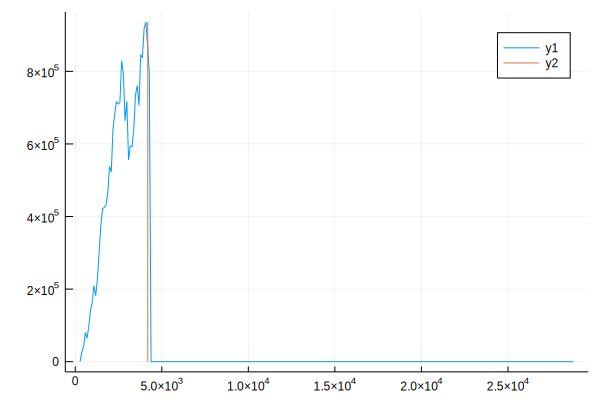

In [74]:
plot(t,meansd[:]) 
plot!([tD, tD],[0, maximum(meansd[:])])